In [3]:
import os
import pandas as pd
import numpy as np
import scipy
import sklearn
import statsmodels
import sys

print('Python', sys.version)

for i in [pd, np, scipy, sklearn, statsmodels]:
    print(i.__name__, i.__version__)

Python 3.10.9 (main, Jan 19 2023, 01:50:55) [GCC 8.4.0]
pandas 2.1.1
numpy 1.26.1
scipy 1.11.3
sklearn 1.3.2
statsmodels 0.14.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분석 중급 문제 3번

지난 15년간 흡연을 하던 데이터분석가 Ku는 흡연 장소에 있던 푸르렀던 나무들이 노랗게 고사하는 것을 보고,

시들어 가는 자신의 모습을 떠올리며 금연을 결심했습니다. 

금연 지원 센터에서 상담사 재윤 선생님께서 재능 기부를 권유하며 

흡연자와 비흡연자와의 신체 지수를 분석을 의뢰했고, 

Ku는 결심을 다지고자 흔쾌히 응했습니다. 

Ku를 도와 다음 분석 과제를 진행해보세요.


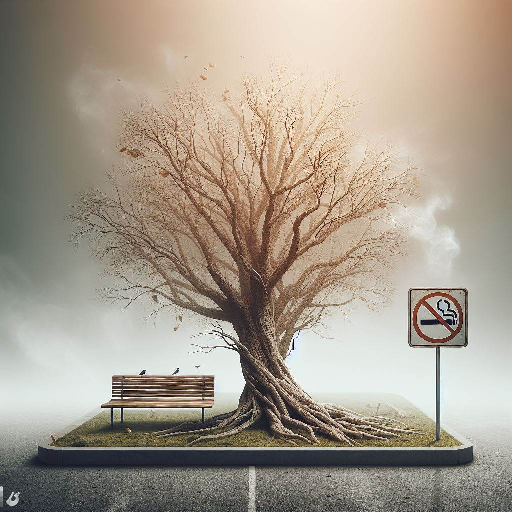

|변수명|설명|형식|
|----|---|---|
|Seq|샘플번호|정수형|
|age|연령|정수형|
|height|키,cm|정수형|
|weight|무게,kg|정수형|
|waist|허리둘레,cm|정수형|
|eyesight_left|좌측 시력|실수형|
|eyesight_right|우측 시력|실수형|
|hearing_left|좌측 청력|정수형|
|hearing_right|우측 청력|정수형|
|systolic|수축기 혈압|정수형|
|relaxation|이완기 혈압|정수형|
|fasting_blood_sugar|공복 혈당|실수형|
|Cholesterol|총 콜레스트롤|실수형|
|triglyceride|중성지방|실수형|
|HDL|고밀도 콜레스트롤|실수형|
|LDL|저밀도 콜레스트롤|실수형|
|hemoglobin|헤모들로빈|실수형|
|Urine_protein|요단백|정수형|
|serum_creatinine|혈중 크레아티닌|실수형|
|AST|Aspartate Aminotransferase<br/>간의 건강상태를 나타내는 지수, 높을 수록 간질환 가능성 상승|실수형|
|ALT|Alanine Aminotransferase<br/>간의 효소, 높을 수록 간의 손상 가능성 상승|실수형|
|Gtp|Gamma-Glutamyl Transferase<br/>간 기능과 담도 건강을 나타내는 지수|실수형|
|dental_caries|치아 우식, 0 or 1|정수형|
|smoking|흡연 여부, 0: 미흡연, 1: 흡연|정수형|

샘플수: 38,984건

데이터셋 명칭은 smoker이고 파일명은 smoker.csv입니다.

# 전치리

**Step pre-1**

eyesight_left, eyesight_right 시력은 연속형 변수이지만 주로 나오는 값이 있습니다. 

1.5, 1.2와 같은 값은 자주 등장하지만, 1.1, 1.7 등의 값은 아주 드물게 등장합니다. 

eyesight_left, eyesight_right를

드물게 등장하는 값을 아래와 같이 치환하여 정리하여, 

데이터 처리를 여러 방향으로 생각해보기 용이하도록 해봅니다.

변경 내용
```
1.1 → 1.0
1.3 → 1.2
1.6 → 1.5
1.7 → 1.5
1.8 → 2.0
1.9 → 2.0
9.9 → 치환 이전의 eyesight_left, eyesight_right를 통틀어 가장 자주등장하는 수치
```

**Step pre-2**

eyesight_left와 eyesight_right를 합쳐서 파생변수 eyesight를 만듭니다.

**Step pre-3**

아래 표에서 나타내는 조건에 맞게 범주형 파생 변수 hearing을 만듭니다.

|조건|수준명|
|---|----|
|hearing_left와 hearing_right가 모두 1일 경우|2|
|hearing_left와 hearing_right가 하나만 1일 경우|1|
|hearing_left와 hearing_right가 1이 없는 경우|0|

전처리 과정을 완료한 **smoker**셋을 **basetable**이라고 식별하겠습니다.

# 문제 1

40세 미만과 40세 이후와의 데이터 성향이 크게 시각화 과정에서 파악이 되었습니다.

아래 주요 변수간에 상관도를 나타내는 히트맵 그래프에서 확인할 수 있습니다.

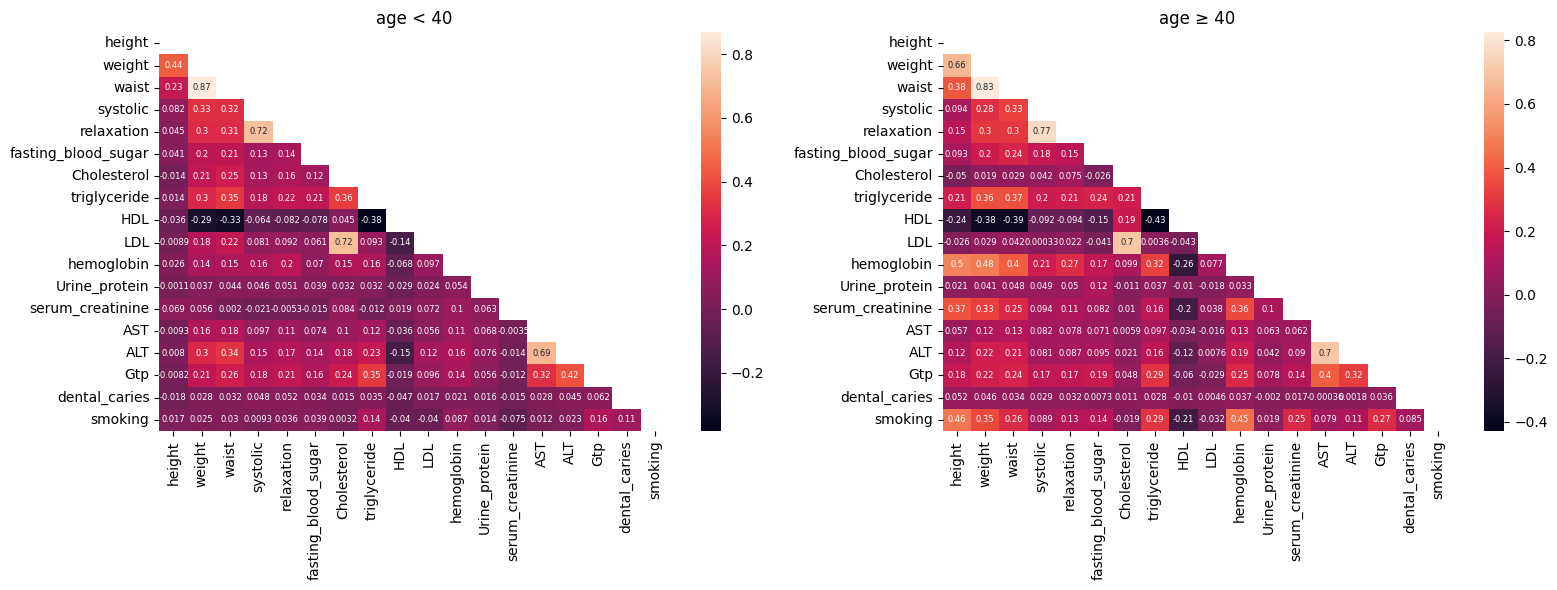

두 표집간의 차이점을 분석하기 위해 두 표집을 구분하는 데 중요한 변수들을 파악해봅니다.

**Step 1-1** 

**basetable** 에 age가 40 미만이면 False, age가 40 이상이면 True 파생변수 after_40을 **prob1**셋을 추가합니다.

**Step 1-2**

**prob1**을 Seq가 5의 배수가 아니면 **train1**, Seq가 5의 배수이면 **test1**으로 나눕니다.

**Step 1-3**

Random Forest 분류기를 이용하여 아래 변수 중에서 대상변수 after_40을 분류하는데 중요도가 높은 변수를 파악하고자 합니다.

두 개의 집단을 구분짓게 하는 중요한 변수를 찾아 

    height, weight, waist, eyesight, hearing,
    systolic, relaxation, fasting_blood_sugar, Cholesterol, triglyceride, 
    HDL, LDL, hemoglobin, Urine_protein, serum_creatinine, AST, ALT, Gtp, dental_caries

Random Forest 분류기의 설정은  아래와 같습니다.

|하이퍼 파라메터|설정|
|----|----
|결정트리의 수|50|
|트리의 노드를 분기 시 최소 샘플수|4|
|랜던 시드|123|

**Python 가이드**
```
sklearn.ensemble 모듈에서 제공하는 기능을 활용합니다.
```

**Step 1-3-1**: 입력 후보 변수로 위에서 열거한 변수로 설정합니다.

**Step 1-3-2**: 입력 후보 변수를 열거 순서에 맞추어 **train1**으로 학습 데이터셋을 구성하여 Random Forest 분류기를 학습합니다.

**Step 1-3-3**: **test1**으로 Random Forest 분류기의 성능을 AUC(Area under receiver operating characteristic curve)를 구합니다.

**Step 1-3-4**: Random Forest 분류기에서 입력변수의 중요도가 높은 변수를 구하여 입력 후보 변수를 구합니다.

**Step 1-3-5**: 입력 후보 변수에서 가장 중요도가 높은 변수를 제외합니다.

**Step 1-3-6**: **Step 1-3-2**에서 **Step 1-3-5**까지 과정을 round라고 합니다. 입력 후보 변수가 더이상 없을 때까지 round를 반복합니다.

 아래 형태로 round별로 제외한 입력변수명과 라운드에서 측정한 AUC를 남깁니다. 이 데이터프레임의 명칭을 **importance**라고 합니다.
 
 
|round|variable|auc|
|---|----|---|
|1|height|0.923...|
|2|hemoglobin|0.917...|
...

**Step 1-4**

**importance**에서 이전 라운드의 auc와  auc의 차가 가장 큰 경우의 그 차이 값을 소수점 다섯째 자리에서 반올림하여 넷째자리 까지 구합니다.

# 문제 2

Ku는 문제 1을 통해 height가 40세 미만과 40세 이후의 표집을 구분짓는 요소임을 파악했고

위 시각화를 통해 smoking의 경향이 40세 전후로 현저하게 차이가 남을 파악했습니다.

표본 수집에 있어 어떠한 특이 사항이 있는지를 의뢰한 재윤 선생님에게 문의한 결과,

40세 미만에서는 군인을 대상으로 표본을 수집했다하는 사실을 알아냈습니다.

따라서 40세 미만 샘플은 주로 남성이 샘플링 되었다고 합니다. 

그러면서, 여성은 남성보다 흡연율이 훨씬 낮니만, 구체적인 수치를 본 데이터로 유추해보자고 제안 하셨습니다.

이에 대한 분석을 진행해봅니다.

**Step 2-1**

재윤 선생님은 아래 그래프를 보여주면서, 신장(height)으로 놓고 본다면 40세 전은 흡연 비율이 40세 이후에 비해 균일한 특징을 보이고 있습니다.

샘플의 대부분이 군인인 40세 미만 집단은  체격 수치(height, weight, waist)만으로는 남성인지 여성인지 구분하기 어렵다고 합니다.

<img src="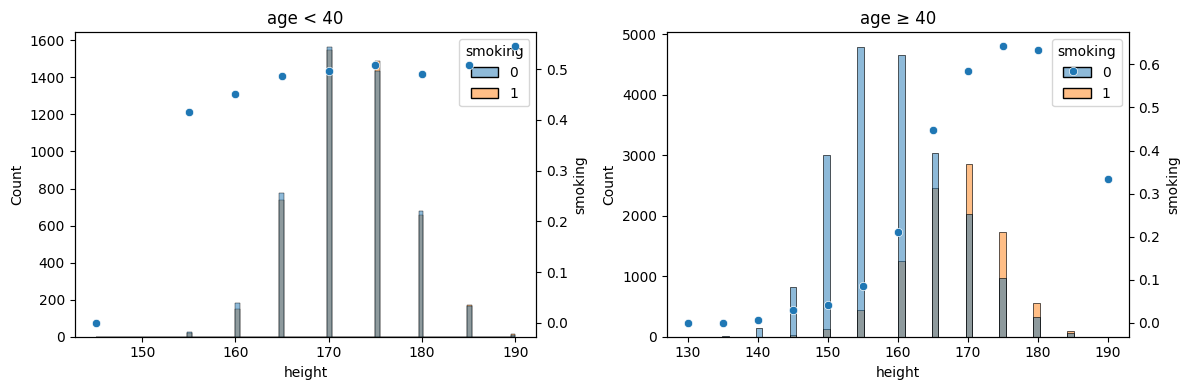
">

**basetable**에서 분석의 대상은 체격 수치(height, weight, waist)로 성별을 유추할 수 있는 

연령(age)이 40세 이상인 데이터만을 뽑아 **prob2** 셋을 만듭니다.

**Step 2-2**

height, weight, waist를 표준화하고, 동일한 변수명으로 표준화한 값을 적용합니다.

**Python 가이드**
```
sklearn.preprocessing 에 있는 기능을 활용합니다.
```

**Step 2-3**

**prob2**에서 K-Mean 군집화 모델로 군집수를 2개로 하고, 초기 중심점을 총 50번 바꾸어 군집화를 해보고 가장 손실이 적은 결과를 취하도록 모델을 설정합니다.

입력 변수: height, weight, waist

**Python 가이드**
```
sklearn.cluster.KMeans, random_state=123, init='random'
```

**Step 2-4**

**prob2**에서 학습한 군집화 모델에 의해 출력된 군집으로 구분하여 smoking의 비율을 구합니다. 

이 때 흡연(smoking=1) 비율이 높으면 해당 군집은 남성(gender=M)으로 아니면 여성(gender=F)으로 간주합니다.

A=$P(smoking=1|gender=M)$, 

B=$P(smoking=1|gender=F)$

A, B 를 구합니다.

# 문제 3

재윤 선생님은 데이터셋에서는 흡연과 비만이 간 건강에 미치는 영향을 조사해보고자 합니다.

간의 건강을 나타내는 AST와 흡연 유무과 비만 여부 그리고 연령(Age)와의 관계성을 조사합니다.

**Step 3-1**

**basetable**에서  비만 정도를 측정하는 BMI 지수를 구해 파생변수 명을 bmi로 추가하여 **prob3**셋을 만듭니다.

$BMI=\frac{weight(체중, kg)}{height(키, m)^2}$

**Step 3-2**

**prob3**에 BMI에 범위에 따라 body 라는 범주형 파생변수를 생성합니다.

|BMI 범위|body 값|
|----|----|
|18.5 미만|Under|
|18.5 이상 25미만|Normal|
|25이상 30미만|Over|
|30이상|Obese|

**Step 3-3**

**prob3**에 body를 수준명의 사전순으로 가장 먼저인 수준을 제외하여 가변수를 수준명에 따라 

body_Obese, body_Over, body_Under

로 하여 만듭니다.

**Step 3-4**

AST변수를 자연로그 변환을 하고 AST에 저장하고, 

age는 최소값은 0, 최대값은 1이 되도록 정규화 하여 age에 저장합니다.

Python 가이드
```
정규화는 sklearn.preprocessing에서 제공하는 기능을 활용합니다.
```

**Step 3-4**

**prob3**에서 body_Obese, body_Over, body_Under, smoking, age을 독립변수로 AST를 종속변수로 하여 절편이 있는 선형회귀 모델을 만듭니다.

smoking의 회귀계수의 95% 신뢰수준으로 신뢰구간을 구하여 하한을 A 상한을 B라고 합니다.

body_Obese의 회귀계수를 C라고 합니다.

A + B + C를 구하여 소수점 넷째자리에서 반올림하여 셋째자리까지 표시합니다.

```
sklearn.linear_model 또는 statsmodels.api 에서 제공하는 기능을 활용합니다.
```

# 출제 영역


|문제|영역|
|----|----|
|전처리|데이터 클린징|
|1|Random Forest 분류기|
|2|정규화, K-Mean 군집화|
|3|선형 회귀분석, 파생 변수생성, 구간화|